# Red Wine Quality Prediction Project #
## Project Description ##
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as a classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Objective: Use machine learning to determine which physiochemical properties make a wine 'good'!


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("F:\\FlipRobo\\")


In [3]:
# Loading the actual dataset
df = pd.read_csv("winequality-red.csv", na_values=["?"])
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Checking the shape of the dataset
df.shape


(1599, 12)

In [6]:
# Displaying detailed summary statistics
df.describe(include="all")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Displaying information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Observation: There are no categorical data. Hence there is no need for encoding (Label encoder / One hot encoding)

In [9]:
# Exploring null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Exploring unique values of each variable
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

#### Observation: Quality is a discrete variable, which has only 6 unique values. However, free sulfur dioxide has also only 60 unique values. But it can be considered as a continuous variable.

In [11]:
# Displaying column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Replacing empty strings with NaN
df1 = df.replace(" ", np.nan)

In [13]:
# Displaying the first few rows of the DataFrame after replacing empty strings with NaN
df1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Checking for null values after replacing empty strings with NaN
df1.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Observation: There are no null values in any of the variables. Therefore, there is no need to impute any data

## Visualization

### To check for the skewness of the features

In [15]:
# Displaying skewness for each column
df1.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

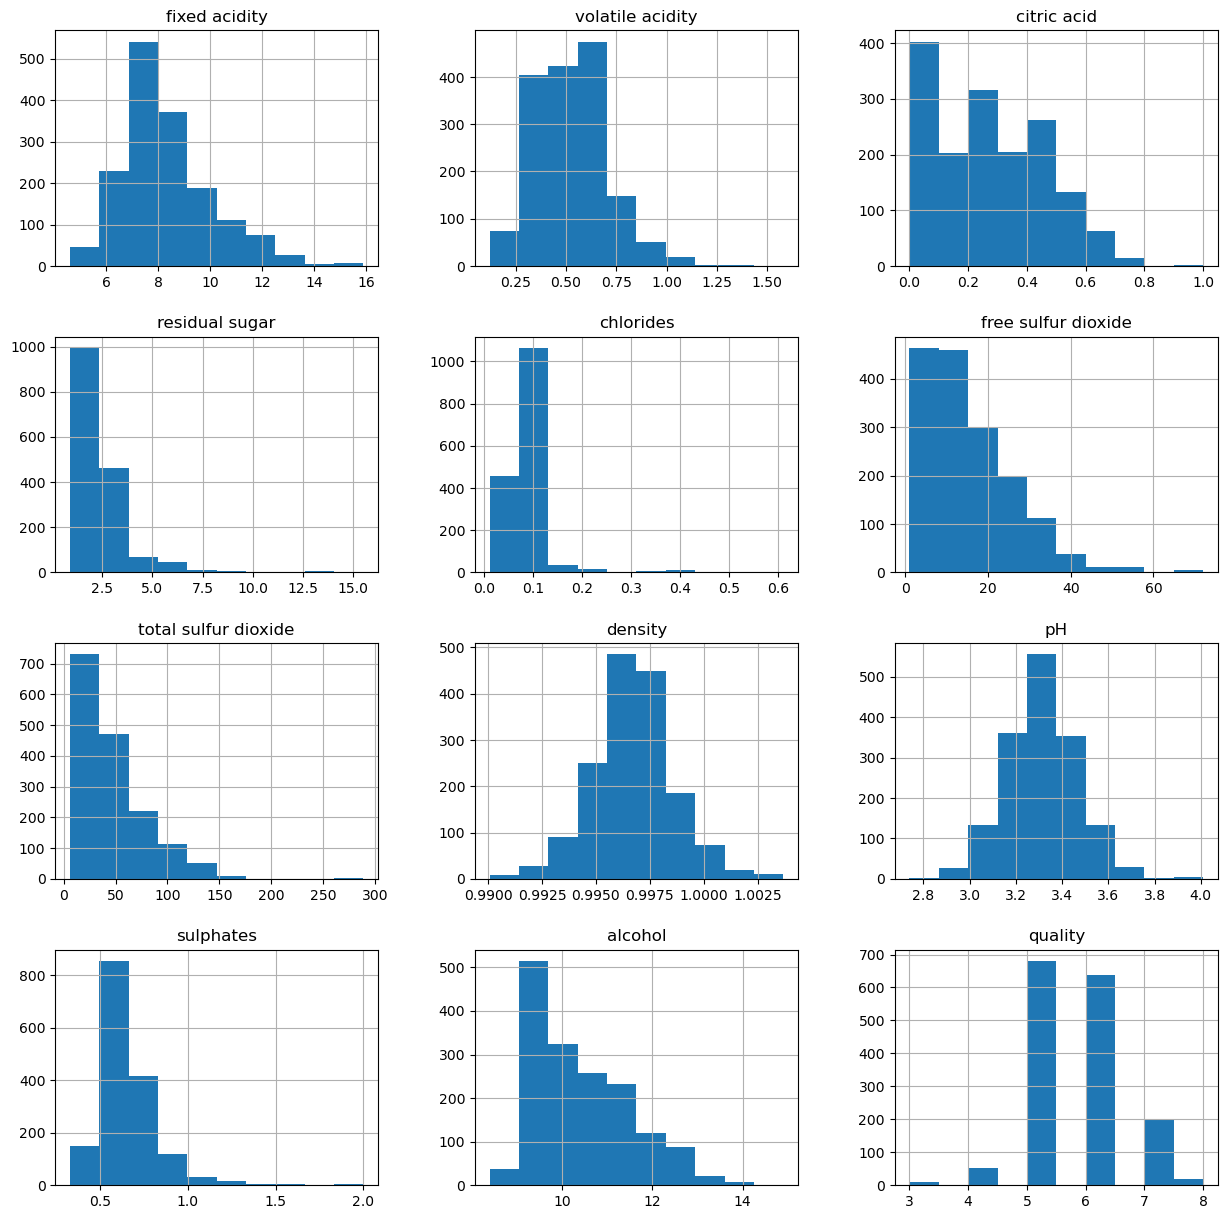

In [16]:
# Visualizing histograms for each column
df1.hist(figsize=(15,15))
plt.show()

In [17]:
# Calculating skewness for each column
for i in df1.columns[:-1]:
    skewness = df1[i].skew()
    print(f"Skewness of {i}:", skewness)

Skewness of fixed acidity: 0.9827514413284587
Skewness of volatile acidity: 0.6715925723840199
Skewness of citric acid: 0.3183372952546368
Skewness of residual sugar: 4.54065542590319
Skewness of chlorides: 5.680346571971722
Skewness of free sulfur dioxide: 1.250567293314441
Skewness of total sulfur dioxide: 1.515531257594554
Skewness of density: 0.07128766294927483
Skewness of pH: 0.19368349811284427
Skewness of sulphates: 2.4286723536602945
Skewness of alcohol: 0.8608288068888538


#### Observation: 

##### (i) All the variables are highly skewed, except density
##### (ii) 'quality' is the target variable which is discrete

### Reducing skewness: Using Box-Cox transformation of the continuous variables

Skewness of fixed acidity: 0.0001775059507489679


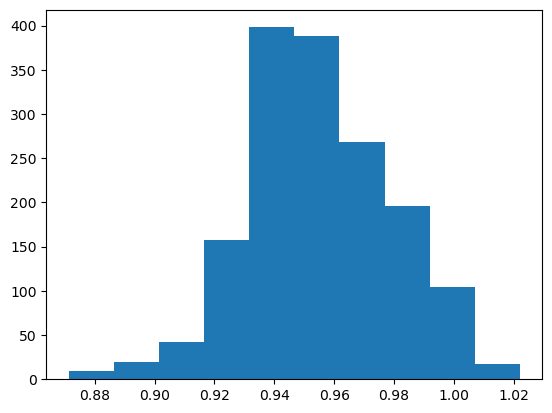

Skewness of volatile acidity: -0.0031701884254366516


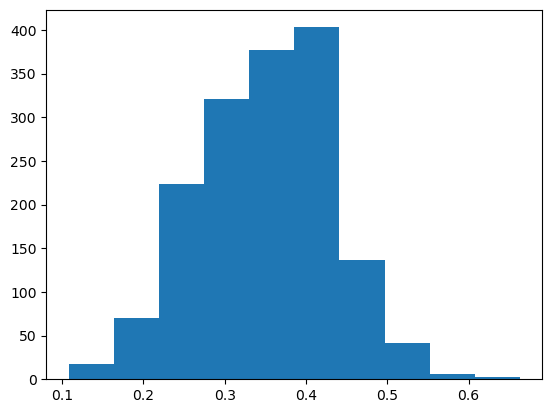

Skewness of citric acid: -0.03036491327622686


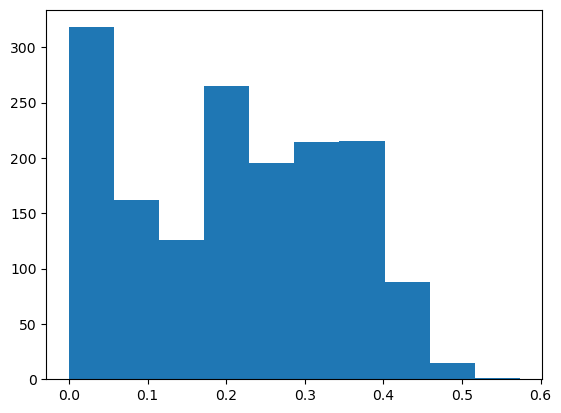

Skewness of residual sugar: 0.005197443187332545


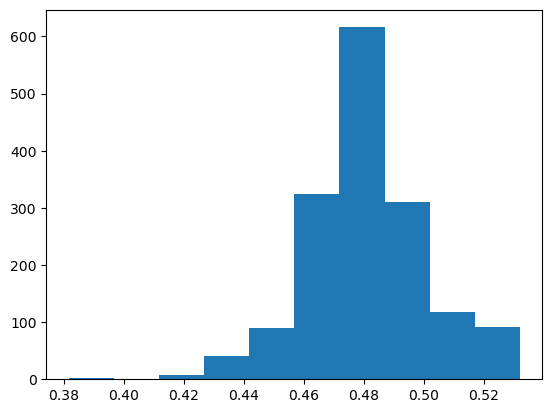

Skewness of chlorides: 0.027005502328630124


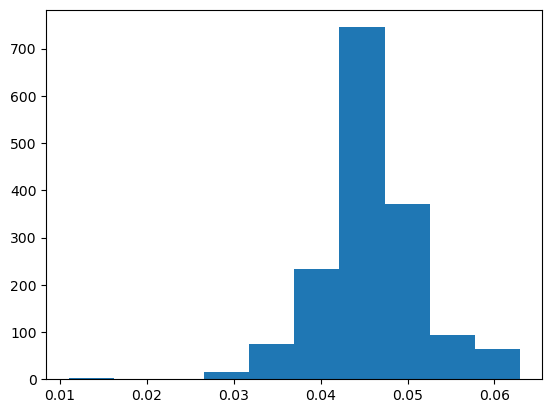

Skewness of free sulfur dioxide: -0.041322416786570046


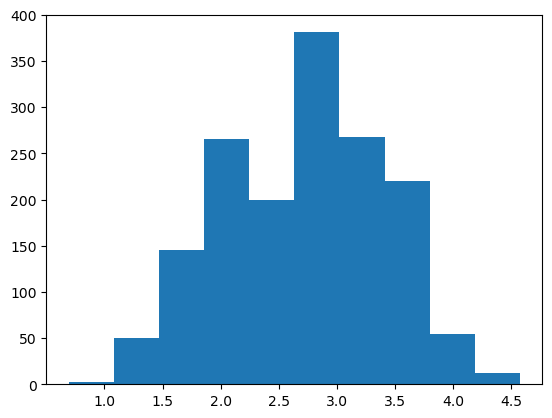

Skewness of total sulfur dioxide: -0.033498387858431594


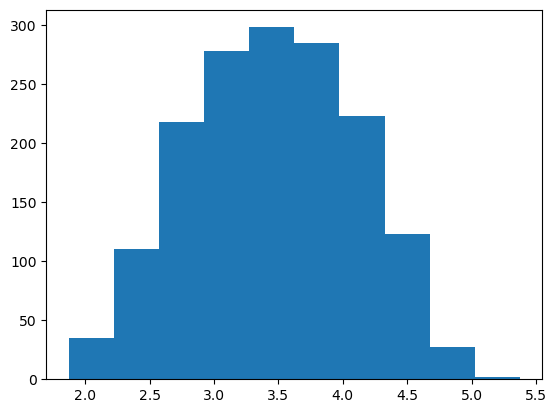

Skewness of density: 0.0


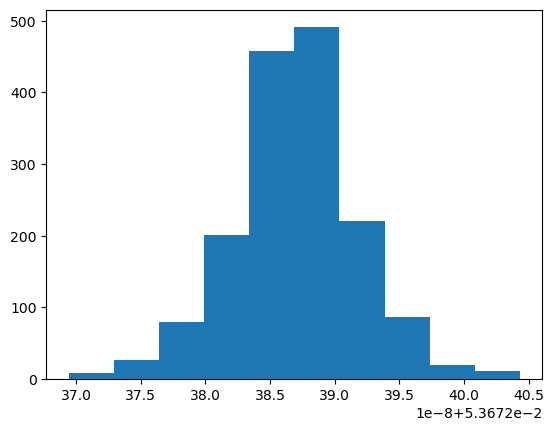

Skewness of pH: 0.0024667467387805256


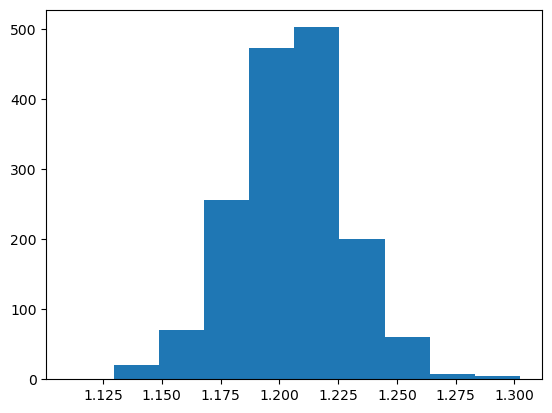

Skewness of sulphates: 0.00017001082456823783


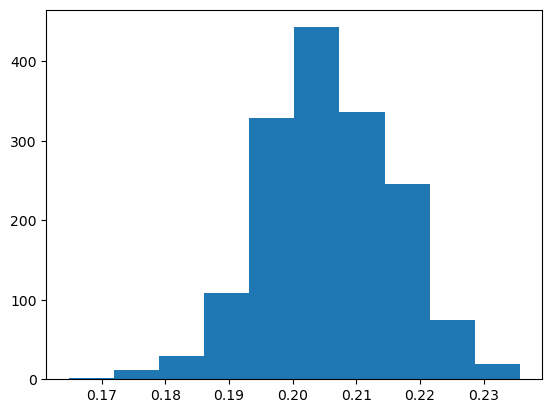

Skewness of alcohol: 0


C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:924: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\admin\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\admin\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


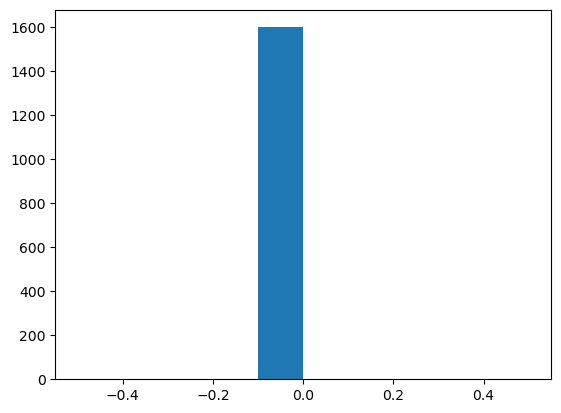

In [27]:
from scipy.stats import boxcox
df2=pd.DataFrame()
for i in df1.columns[:-1]:
    coll, lambda_value = boxcox(df1[i] + 1)
    df2[i]=coll
    skewness5 = pd.Series(coll).skew()
    print(f"Skewness of {i}:", skewness5)
    plt.hist(coll)
    plt.show()


In [23]:
df2.skew()

fixed acidity           0.000178
volatile acidity       -0.003170
citric acid            -0.030365
residual sugar          0.005197
chlorides               0.027006
free sulfur dioxide    -0.041322
total sulfur dioxide   -0.033498
density                 0.000000
pH                      0.002467
sulphates               0.000170
alcohol                 0.000000
dtype: float64

In [32]:
df1.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015714
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.000000
pH                     -0.002822
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

In [21]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.944076,0.431464,0.000000,0.468948,0.044825,2.549607,3.383410,0.053672,1.235365,0.199934,0.000055
1,0.950879,0.494553,0.000000,0.491998,0.050312,3.394190,4.006723,0.053672,1.188724,0.209911,0.000055
2,0.950879,0.453780,0.038743,0.483909,0.049011,2.860278,3.807454,0.053672,1.198100,0.207755,0.000055
3,0.991565,0.223682,0.391608,0.468948,0.044524,2.988672,3.904676,0.053672,1.182376,0.201870,0.000055
4,0.944076,0.431464,0.000000,0.468948,0.044825,2.549607,3.383410,0.053672,1.235365,0.199934,0.000055


array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>,
        <AxesSubplot:xlab

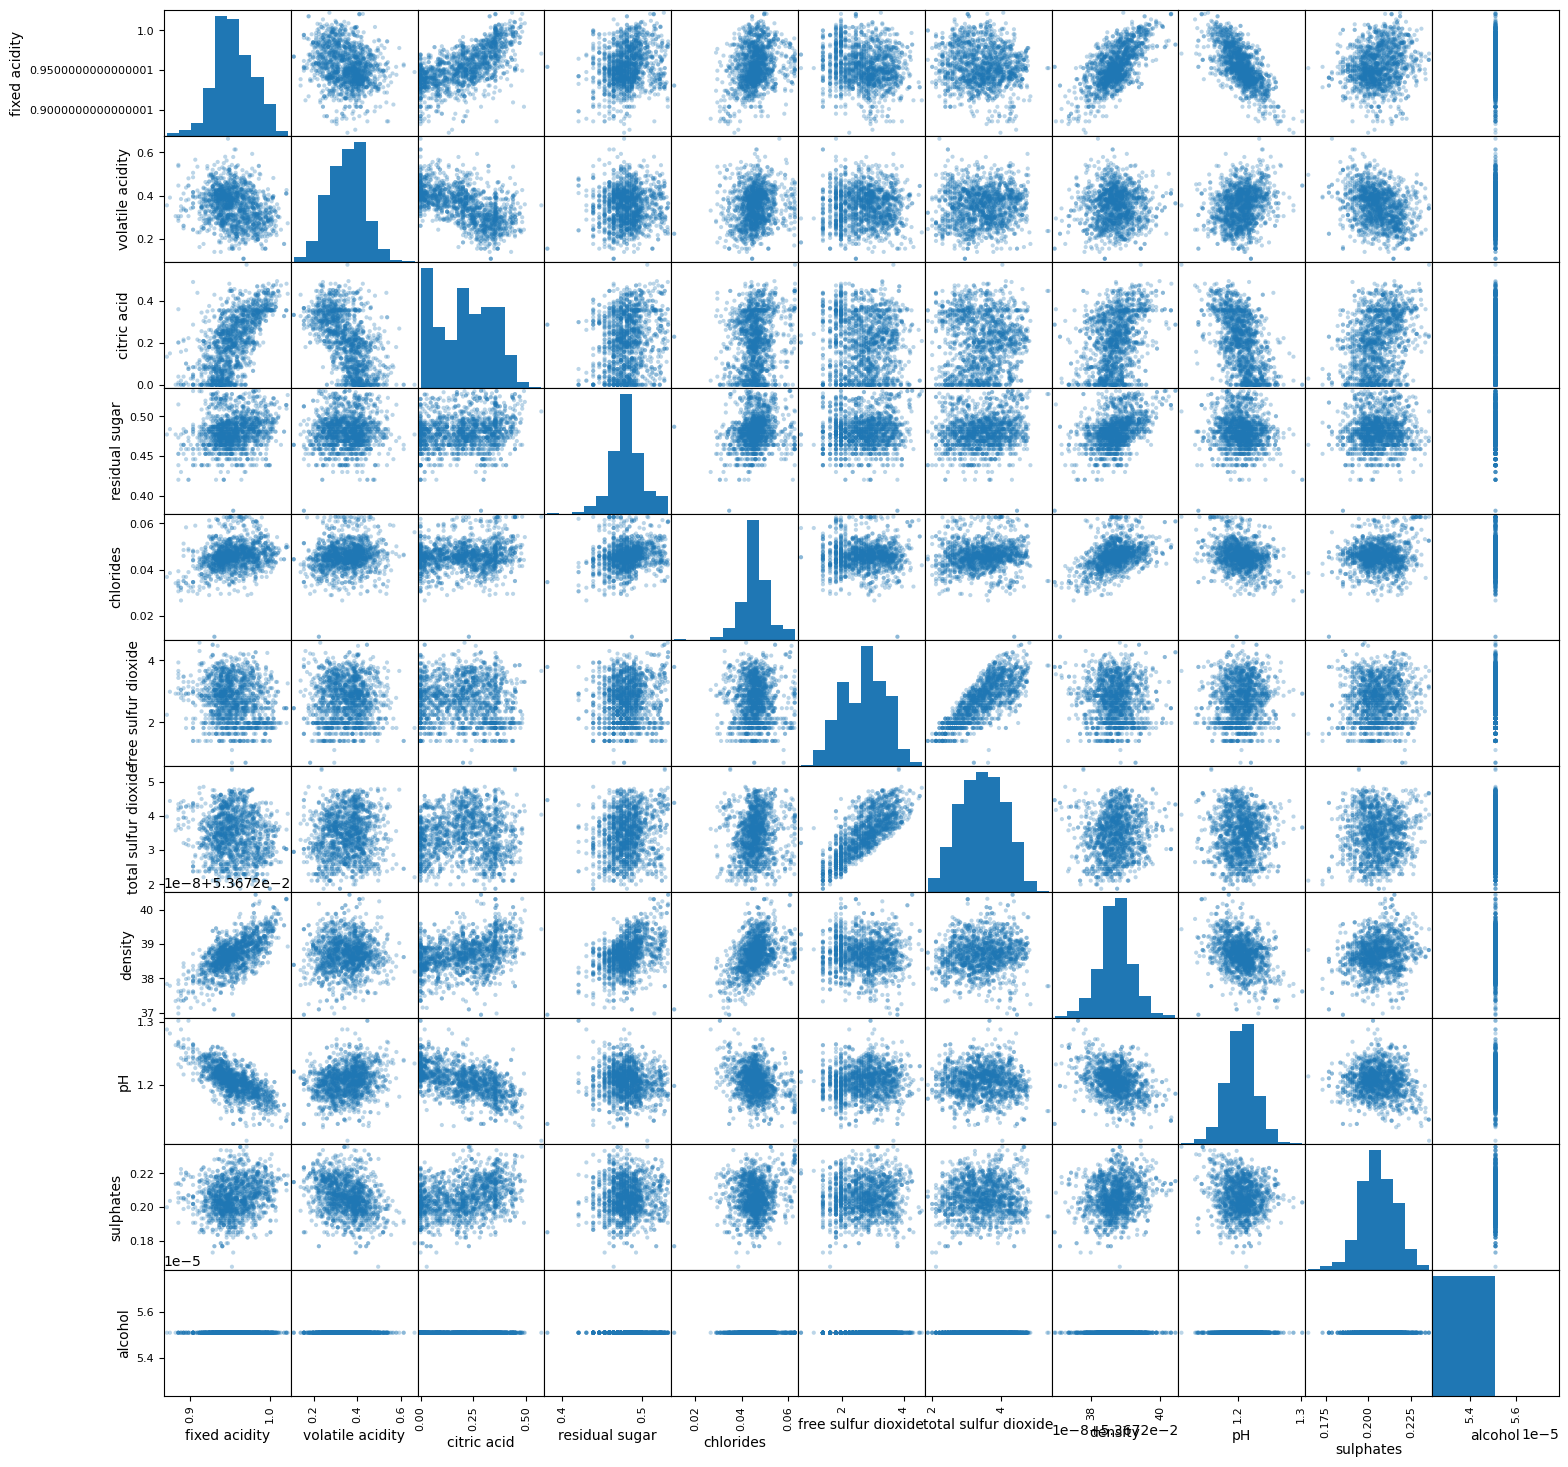

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2, alpha=0.3, figsize=(18,18))

 #### Observation: The skewness of all the variables has considerably reduced after the transformation

### To check for multicollinearity

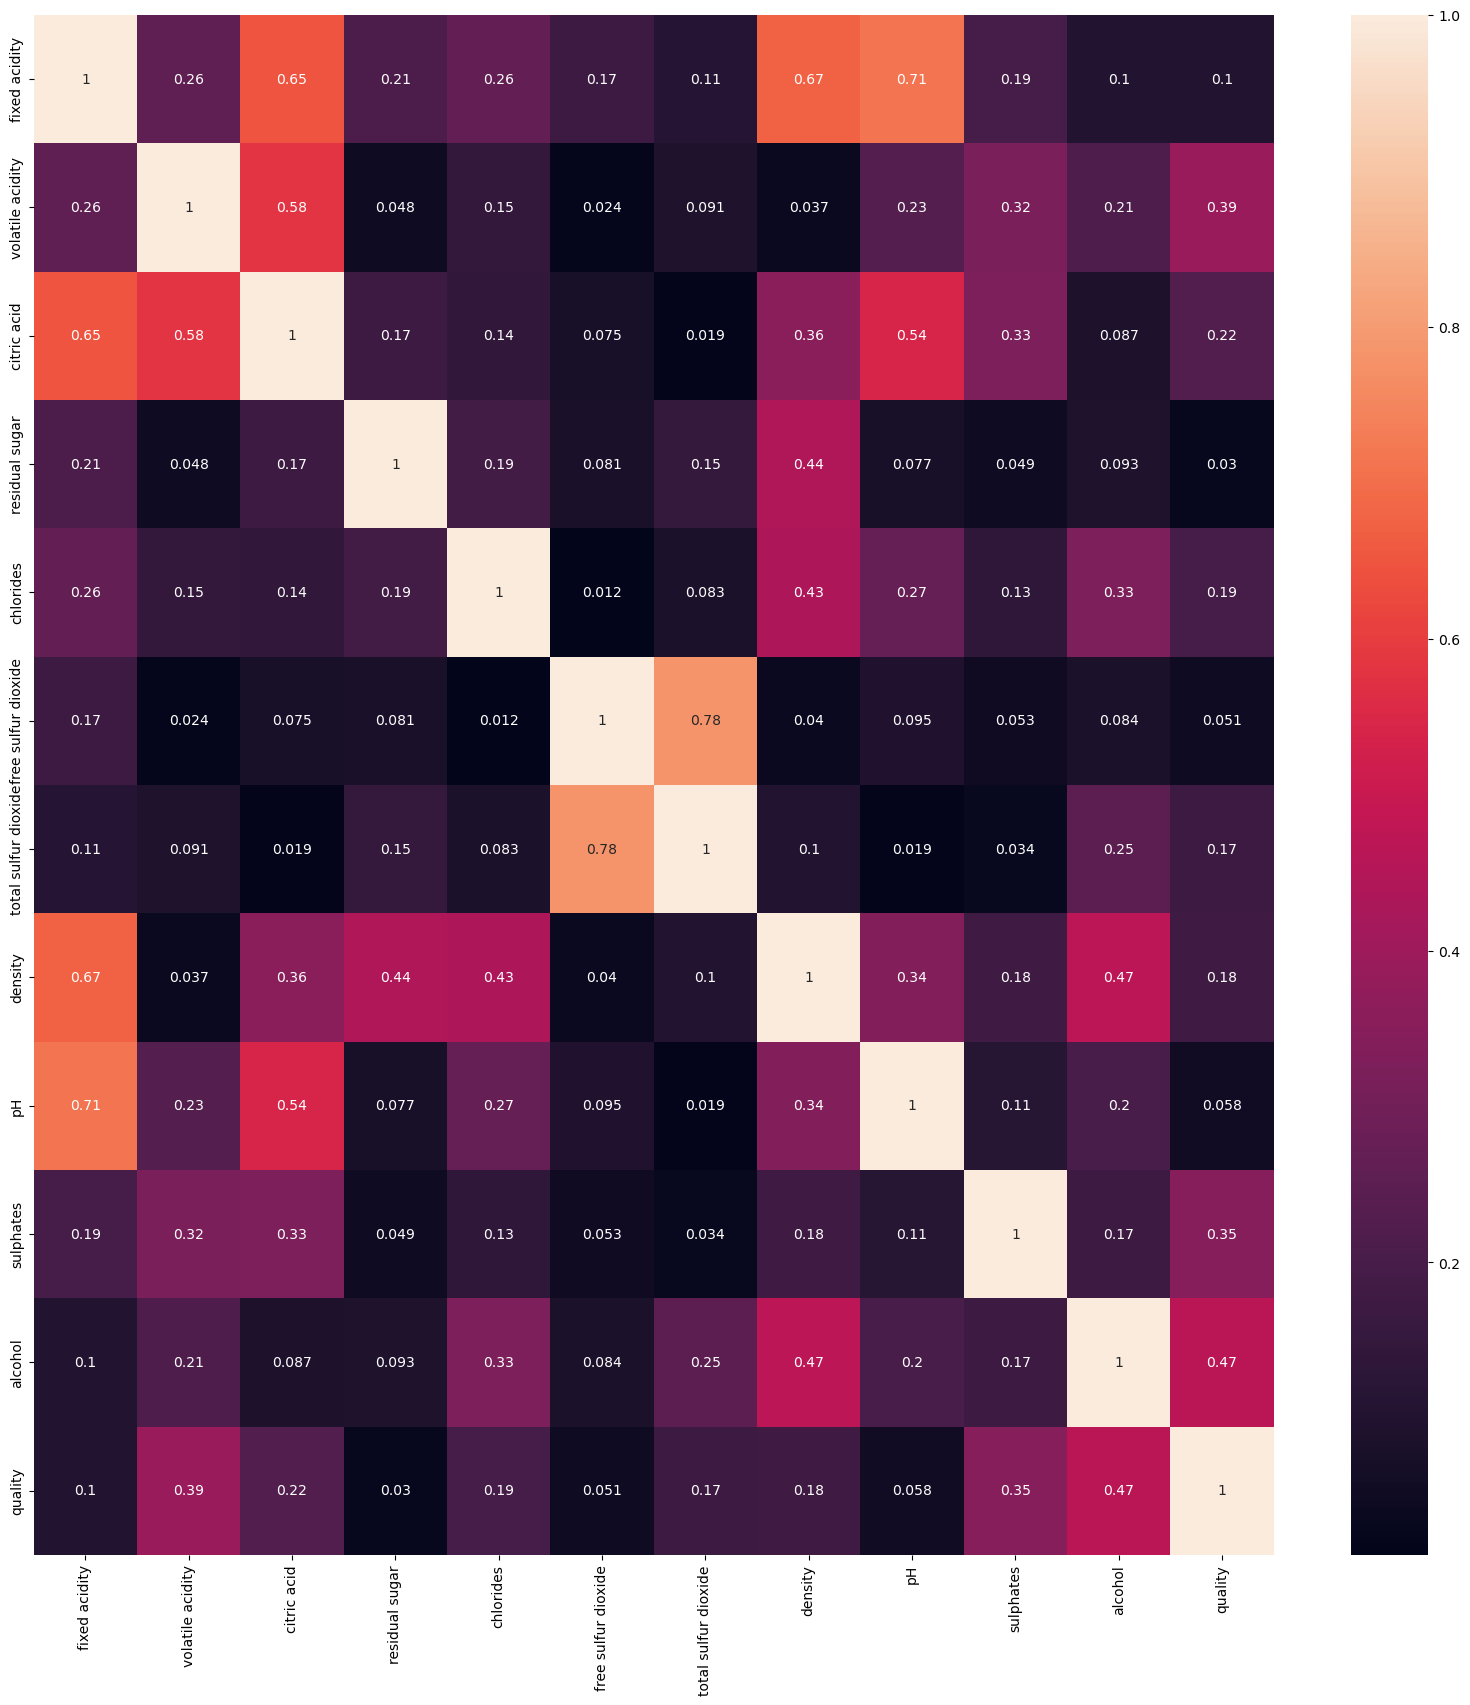

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(df1.corr()), annot=True)
plt.show()

In [34]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.257764,0.648933,0.211126,0.263545,-0.173330,-0.109233,0.672953,-0.713193,0.194683,-0.102182,0.104976
volatile acidity,-0.257764,1.000000,-0.581703,0.048267,0.145660,0.023704,0.091369,0.037007,0.229063,-0.318655,-0.214187,-0.393870
citric acid,0.648933,-0.581703,1.000000,0.172915,0.141873,-0.075167,0.018860,0.355411,-0.544334,0.328289,0.087339,0.223351
residual sugar,0.211126,0.048267,0.172915,1.000000,0.189357,0.080697,0.148348,0.438560,-0.077489,0.048653,0.092578,0.030091
chlorides,0.263545,0.145660,0.141873,0.189357,1.000000,-0.012466,0.083486,0.433402,-0.270999,0.134354,-0.327684,-0.193982
free sulfur dioxide,-0.173330,0.023704,-0.075167,0.080697,-0.012466,1.000000,0.781665,-0.039731,0.094640,0.053085,-0.083968,-0.050616
total sulfur dioxide,-0.109233,0.091369,0.018860,0.148348,0.083486,0.781665,1.000000,0.103082,-0.018559,0.033971,-0.251624,-0.172276
density,0.672953,0.037007,0.355411,0.438560,0.433402,-0.039731,0.103082,1.000000,-0.340278,0.176066,-0.470191,-0.177241
pH,-0.713193,0.229063,-0.544334,-0.077489,-0.270999,0.094640,-0.018559,-0.340278,1.000000,-0.114392,0.203334,-0.057577
sulphates,0.194683,-0.318655,0.328289,0.048653,0.134354,0.053085,0.033971,0.176066,-0.114392,1.000000,0.167876,0.345841


 #### Observations: \n",
    ####  (1) 'fixed acidity' shows very high correlation with 'pH', 'density', and 'citric acid',
    ####  (2) 'free sulhur dioxide' shows very high correlation with ' total sulphur dioxide',
    
    #### 'fixed acidity' shows very high correlation with pH. From the knowledge of chemistry we know that as acidity (H ion conc.) increases pH goes down. Also 'fixed acidity' shows very high correlation with 'citric acid', which is a acid and hence would show positive correlation."

 ### To estimate the extent of correlation using Variance Inflation Factor (VIF)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["Features"] = X.columns
VIF["VIF value"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,fixed acidity,5.135990e+00
1,volatile acidity,1.888665e+00
2,citric acid,2.849112e+00
3,residual sugar,1.293500e+00
4,chlorides,1.363657e+00
5,free sulfur dioxide,2.870715e+00
6,total sulfur dioxide,3.140445e+00
7,density,3.121412e+00
8,pH,2.533340e+00
9,sulphates,1.212071e+00


### Splitting the dataset as features (X) and labels (y)

In [41]:
y=df1['quality']   # Labels
X=df2              # Features

### To check for class imbalance in the labels (y)

In [43]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Observation: Classes 3, 8, 4 and 7 are minority classes. So there is imbalance in the class labels. 

### using SMOTE to balance the classes

In [44]:
!pip install imbalanced-learn

In [48]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [49]:
y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

#### Observation: Now the classes are all balanced

In [52]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4.086000e+03,4086.000000,4086.000000,4.086000e+03
mean,0.954789,0.367526,0.203868,0.481667,0.045844,2.549223,3.224378,5.367239e-02,1.208393,0.205899,5.509309e-05
std,0.023962,0.098231,0.139336,0.019727,0.005661,0.677761,0.637581,4.850314e-09,0.023310,0.010220,4.208575e-18
min,0.871353,0.108255,0.000000,0.381638,0.011022,0.694018,1.872531,5.367237e-02,1.110446,0.164835,5.509309e-05
25%,0.939561,0.287978,0.064749,0.469026,0.042722,1.973642,2.649506,5.367238e-02,1.192093,0.198917,5.509309e-05
50%,0.953089,0.364375,0.215699,0.480690,0.045411,2.549607,3.195940,5.367239e-02,1.207574,0.206203,5.509309e-05
75%,0.971939,0.434907,0.327454,0.493840,0.048557,3.047848,3.701868,5.367239e-02,1.223864,0.213683,5.509309e-05
max,1.022039,0.663081,0.573442,0.532007,0.062926,4.573159,5.375198,5.367240e-02,1.302304,0.235660,5.509309e-05


### Scaling the features

   #### As some features have different range than others like density is of the order 0.01 where as alcohol is of order 0.000055, so we need to scale the data in order to ensure uniform weightage across all features."

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X)
X2=pd.DataFrame(X1, columns=X.columns)
X2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.447169,0.650973,-1.463320,-0.644823,-0.180048,0.000566,0.249461,0.680063,1.157286,-0.583774,-1.355253e-20
1,-0.163213,1.293305,-1.463320,0.523748,0.789478,1.246855,1.227202,0.154411,-0.843882,0.392596,-1.355253e-20
2,-0.163213,0.878180,-1.185233,0.113621,0.559556,0.459001,0.914625,0.259930,-0.441630,0.181572,-1.355253e-20
3,1.534945,-1.464524,1.347549,-0.644823,-0.233207,0.648462,1.067129,0.784613,-1.116287,-0.394289,-1.355253e-20
4,-0.447169,0.650973,-1.463320,-0.644823,-0.180048,0.000566,0.249461,0.680063,1.157286,-0.583774,-1.355253e-20
...,...,...,...,...,...,...,...,...,...,...,...
4081,-0.471720,-0.876499,0.401961,-0.407939,-1.381402,0.395301,0.022747,-0.851670,-0.763326,0.885371,-1.355253e-20
4082,0.955250,-0.945708,1.435484,1.026694,0.090021,-0.842781,-0.692049,0.238533,-1.073041,1.298099,-1.355253e-20
4083,0.445877,-0.750120,0.212836,-0.267632,-0.321690,1.911796,1.013527,-1.159107,-0.778300,0.393765,-1.355253e-20
4084,-2.374228,-0.705195,0.046177,-0.523162,-0.966547,0.783050,0.583151,-2.317019,1.785012,0.711598,-1.355253e-20


In [53]:
X2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03,4.086000e+03
mean,5.558248e-16,-8.962296e-16,3.832525e-16,3.543964e-16,-4.440688e-16,2.026850e-16,8.971993e-17,-9.265425e-10,-6.498038e-16,-1.570398e-15,-1.355253e-20
std,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,0.000000e+00
min,-3.482508e+00,-2.639722e+00,-1.463320e+00,-5.071219e+00,-6.152096e+00,-2.737590e+00,-2.120534e+00,-3.512361e+00,-4.202512e+00,-4.018480e+00,-1.355253e-20
25%,-6.355986e-01,-8.098997e-01,-9.985658e-01,-6.408772e-01,-5.515779e-01,-8.493428e-01,-9.017547e-01,-6.098269e-01,-6.993689e-01,-6.832344e-01,-1.355253e-20
50%,-7.098563e-02,-3.208302e-02,8.491934e-02,-4.952892e-02,-7.636890e-02,5.662908e-04,-4.460851e-02,3.471004e-02,-3.512494e-02,2.971071e-02,-1.355253e-20
75%,7.157822e-01,6.860316e-01,8.870682e-01,6.171178e-01,4.793691e-01,7.357848e-01,7.490000e-01,6.277160e-01,6.638269e-01,7.617402e-01,-1.355253e-20
max,2.806917e+00,3.009133e+00,2.652717e+00,2.552061e+00,3.017926e+00,2.986573e+00,3.373820e+00,3.679772e+00,4.029382e+00,2.912381e+00,-1.355253e-20


## Model building

In [70]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

### Logistic Regression Classifier

#### To find the best random state

In [56]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=i)
    LR=LogisticRegression()
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc=accuracy_score(y_pred,y_test)
    if Acc>maxAcc:
        maxAcc=Acc
        random_state=i
print(f'Max accuracy: {maxAcc}')
print(f'Best_random_state: {random_state}')

Max accuracy: 0.600326264274062
Best_random_state: 399


In [87]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=399)
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')


Accuracy score : 0.600326264274062
Cross validation score: 0.547902097902098
Classification report:
               precision    recall  f1-score   support

           3       0.87      0.77      0.82       233
           4       0.59      0.54      0.57       204
           5       0.50      0.60      0.54       178
           6       0.36      0.46      0.41       164
           7       0.56      0.50      0.53       224
           8       0.72      0.67      0.70       223

    accuracy                           0.60      1226
   macro avg       0.60      0.59      0.59      1226
weighted avg       0.62      0.60      0.61      1226



### To check for overfitting

In [59]:
y_pred_train=model.predict(X_train)
Acc=accuracy_score(y_pred_train,y_train)
Acc

0.5590909090909091

#### Observation: As training accuracy (0.559) is samller than the test accuracy (0.60), therefore there is no case of overfitting here.

### Decision Tree Classifier

In [88]:
DT=DecisionTreeClassifier()
model=DT.fit(X_train,y_train)
y_pred_DT=model.predict(X_test)
Acc=accuracy_score(y_pred_DT,y_test)
report=classification_report(y_pred_DT,y_test)
conf_matrix=confusion_matrix(y_pred_DT,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')


Accuracy score : 0.7846655791190864
Cross validation score: 0.7762237762237761
Classification report:
               precision    recall  f1-score   support

           3       0.96      0.93      0.94       214
           4       0.85      0.78      0.81       203
           5       0.61      0.70      0.66       188
           6       0.53      0.59      0.56       186
           7       0.82      0.77      0.79       214
           8       0.96      0.90      0.93       221

    accuracy                           0.78      1226
   macro avg       0.79      0.78      0.78      1226
weighted avg       0.80      0.78      0.79      1226



#### Observation: Decision tree classifier has better test accuracy (0.77) than Logistic Regression (0.60)

### Random Forest Classifier

In [90]:
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)
y_pred_RF=model.predict(X_test)
Acc=accuracy_score(y_pred_RF,y_test)
report=classification_report(y_pred_RF,y_test)
conf_matrix=confusion_matrix(y_pred_RF,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.8474714518760196
Cross validation score: 0.8433566433566433
Classification report:
               precision    recall  f1-score   support

           3       1.00      0.97      0.98       212
           4       0.97      0.90      0.93       202
           5       0.64      0.77      0.70       178
           6       0.61      0.66      0.63       192
           7       0.91      0.83      0.87       218
           8       0.99      0.92      0.95       224

    accuracy                           0.85      1226
   macro avg       0.85      0.84      0.84      1226
weighted avg       0.86      0.85      0.85      1226



#### Observation: Random Forest Classifier has better accuracy (0.847) than both Decision tree classifier  (0.77) and Logistic Regression (0.60)

### AdaBoost Classifier

In [91]:
AB=AdaBoostClassifier()
model=AB.fit(X_train,y_train)
y_pred_AB=model.predict(X_test)
Acc=accuracy_score(y_pred_AB,y_test)
report=classification_report(y_pred_AB,y_test)
conf_matrix=confusion_matrix(y_pred_AB,y_test)
cv_score=cross_val_score(AB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.4061990212071778
Cross validation score: 0.4020979020979021
Classification report:
               precision    recall  f1-score   support

           3       0.59      0.54      0.56       227
           4       0.51      0.24      0.32       401
           5       0.17      0.49      0.25        76
           6       0.17      0.38      0.23        93
           7       0.12      0.31      0.17        78
           8       0.89      0.53      0.66       351

    accuracy                           0.41      1226
   macro avg       0.41      0.41      0.37      1226
weighted avg       0.56      0.41      0.44      1226



#### Observation: AdaBoost Classifier has much poorer accuracy (0.40) comapred to Random Forest Classifier (0.847), Decision tree classifier  (0.77) and Logistic Regression (0.60).

### Gradient Boosting Classifier

In [92]:
GB=GradientBoostingClassifier()
model=GB.fit(X_train,y_train)
y_pred_GB=model.predict(X_test)
Acc=accuracy_score(y_pred_GB,y_test)
report=classification_report(y_pred_GB,y_test)
conf_matrix=confusion_matrix(y_pred_GB,y_test)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.7944535073409462
Cross validation score: 0.801048951048951
Classification report:
               precision    recall  f1-score   support

           3       1.00      0.93      0.96       220
           4       0.89      0.84      0.86       201
           5       0.55      0.70      0.62       171
           6       0.53      0.57      0.55       194
           7       0.84      0.78      0.81       215
           8       0.98      0.91      0.94       225

    accuracy                           0.79      1226
   macro avg       0.80      0.79      0.79      1226
weighted avg       0.81      0.79      0.80      1226



#### Observation: GradientBoosting Classifier has better accuracy (0.79) compared to Adaboost (0.40), Decision tree classifier  (0.77) and Logistic Regression (0.60) but poorer than Random Forest Classifier (0.847).

### Support Vector Classifier

In [93]:
SV=SVC()
model=SV.fit(X_train,y_train)
y_pred_SV=model.predict(X_test)
Acc=accuracy_score(y_pred_SV,y_test)
report=classification_report(y_pred_SV,y_test)
conf_matrix=confusion_matrix(y_pred_SV,y_test)
cv_score=cross_val_score(SV,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.7846655791190864
Cross validation score: 0.7692307692307692
Classification report:
               precision    recall  f1-score   support

           3       1.00      0.93      0.96       222
           4       0.89      0.79      0.83       212
           5       0.56      0.71      0.62       170
           6       0.51      0.61      0.55       174
           7       0.78      0.76      0.77       205
           8       1.00      0.85      0.92       243

    accuracy                           0.78      1226
   macro avg       0.79      0.77      0.78      1226
weighted avg       0.81      0.78      0.79      1226



#### Observation: Support Vector Classifier has almost same accuracy (0.784) as Decison Tree (0.77) and GradientBoosting Classifier  (0.79).

### K Neighbors Classifier

In [94]:
KN=KNeighborsClassifier()
model=KN.fit(X_train,y_train)
y_pred_KN=model.predict(X_test)
Acc=accuracy_score(y_pred_KN,y_test)
report=classification_report(y_pred_KN,y_test)
conf_matrix=confusion_matrix(y_pred_KN,y_test)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')

Accuracy score : 0.763458401305057
Cross validation score: 0.7678321678321678
Classification report:
               precision    recall  f1-score   support

           3       1.00      0.89      0.94       232
           4       0.93      0.69      0.79       252
           5       0.46      0.73      0.56       134
           6       0.38      0.60      0.47       133
           7       0.86      0.74      0.79       234
           8       0.99      0.85      0.92       241

    accuracy                           0.76      1226
   macro avg       0.77      0.75      0.75      1226
weighted avg       0.83      0.76      0.78      1226



C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### Observation:K Neighbors Classifier has almost same accuracy (0.76) as  Support Vector Classifier (0.784) and Decison Tree (0.77)

### A point to be kept in mind is that, comparing different classifiers based on accuracy is valid in this case because all the classes have been balanced using SMOTE. So there is no class as such which would dominate over others. Finally, we observe that among all the classification algorithms "Random forest classifier" has the best accuracy (0.85) followed by Gradient boosting classifier (0.79).   Now, to improve the accuracy of the "Random forest classifier", we will perform hyperparameter tuning using GridSearchCV.

### Hyperparameter tuning of Random Forest Classifier using GridSearchCV
#### To look at hyperparameters currently in use by Random Forest Classifier

In [69]:
 from pprint import pprint
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### The hyperparameters that would be considered and are currently in use are:\n",
   
The hyperparameters that would be considered and are currently in use are:
#### (i) max_depth:
max_depth: None,

The longest path between the root node and the leaf node

#### (ii) min_samples_split
min_samples_split: 2,

Tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it. By increasing the value of the min_sample_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting.

#### (iii)max_leaf_nodes
max_leaf_nodes: None,

This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.

#### (iv) min_samples_leaf
min_samples_leaf: 1,

This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node. This hyperparameter also helps prevent overfitting as the parameter value increases.

#### (v) n_estimators
n_estimators: 100,

Number of trees to consider in the random forest. By choosing more number of trees, the time complexity of the Random Forest model increases. Hence, there will be unnecessary use of computational resource.

#### (vi) max_sample (bootstrap sample)
max_samples: None,

Fraction of the original dataset to be given to any individual tree.

#### (vii) max_features
max_features: 'auto',

The number of maximum features provided to each tree in a random forest to find the best split

#### (viii) n_jobs
n_jobs: None,

The number of jobs (parallel processes) to use for fitting the trees. It specifies the number of CPU cores to use during the training process. The default value is None, which means it will use a single core.
If n_jobs=None (the default), the algorithm will use a single core, and the training will be done sequentially.

If n_jobs=-1, it will use all available cores on your machine.

If n_jobs is set to a specific number (e.g., n_jobs=4), it will use that many cores.

#### (ix) verbose
verbose: 0,

It determines whether the model prints information about the training process.
The default value is 0, which means silent mode (no output). If you set verbose to a positive integer, it will print more information about the training process. The higher the value of verbose, the more detailed information will be printed during the training process.

In [106]:
from sklearn.model_selection import GridSearchCV
hyp={'criterion': ['gini','entropy'],
    'max_depth':[2,6,10,14,18,20,22,24],  
    'max_features': ['auto'],
    'n_jobs': [-1],  # Utilize all available cores
    'min_samples_split':[2,3,5,10],
    'verbose': [0]}
grid_search=GridSearchCV(RF,param_grid=hyp)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 3, 'n_jobs': -1, 'verbose': 0}
Best estimators: RandomForestClassifier(max_depth=20, min_samples_split=3, n_jobs=-1)
Best score: 0.8465034965034967


### Hyperparameter tuned Random Forest Classifiers

In [112]:
RF_final=RandomForestClassifier(criterion='gini', max_depth=20, max_features='auto', min_samples_split=3, n_jobs=-1, verbose=0)
model=RF_final.fit(X_train,y_train)
y_pred_RF_final=model.predict(X_test)
Acc=accuracy_score(y_pred_RF_final,y_test)
report=classification_report(y_pred_RF_final,y_test)
conf_matrix=confusion_matrix(y_pred_RF_final,y_test)
print(f'Accuracy score : {Acc}')
print(f'Classification report:\n {report}')

Accuracy score : 0.8539967373572593
Classification report:
               precision    recall  f1-score   support

           3       1.00      0.97      0.98       212
           4       0.96      0.88      0.92       205
           5       0.67      0.81      0.73       177
           6       0.62      0.68      0.65       190
           7       0.92      0.82      0.87       222
           8       0.99      0.94      0.96       220

    accuracy                           0.85      1226
   macro avg       0.86      0.85      0.85      1226
weighted avg       0.87      0.85      0.86      1226



#### Observation: Random forest classifier accuracy after hyperparameter tuning is 0.854, which is a very minor increase over that of the default Random forest classifier (0.847)

### Saving the model

In [113]:
import pickle
file_name='wine_quality.pkl'
pickle.dump(RF_final,open(file_name,'wb'))

### Loading the saved model

In [114]:
loaded_model=pickle.load(open('wine_quality.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.8539967373572593
